<a href="https://colab.research.google.com/github/willianrocha/bootcamp-datascience-alura/blob/main/module_2/ds_mod2_lecture6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/willianrocha/bootcamp-datascience-alura/main/files/dsbc.py
from dsbc import *
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date

pd.options.display.float_format = "{:,.2f}".format
dados = pd.read_csv("https://github.com/willianrocha/bootcamp-datascience-alura/raw/main/files/A160324189_28_143_208.csv", encoding="ISO-8859-1",
            skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",",
            engine='python')
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]
ordenado_por_total = ordenado_por_total / 10**6
ordenado_por_total.index = ordenado_por_total.index.str[3:]
mes_mais_recente = ordenado_por_total.columns[-1]
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
df_pop_por_uf = pd.read_html(url)
df_pop_por_uf = df_pop_por_uf[0]

gastos_e_populacao_recente = clean_n_join(df_pop_por_uf, gastos_do_mais_recente)
gastos_e_populacao_recente["gastos"] = gastos_e_populacao_recente["2020/Jul"] * 10**6
gastos_e_populacao_recente["gastos_por_habitante"] = gastos_e_populacao_recente["gastos"] / gastos_e_populacao_recente["populacao"]
mensal = ordenado_por_total.T

mensal.index = mensal.index.map(para_dia)
mensal_aberto = mensal.reset_index().melt(id_vars=['index'], value_vars=mensal.columns)
mensal_aberto.columns = ["dia_mes_ano", "uf", "gasto"]

--2021-06-05 19:40:28--  https://raw.githubusercontent.com/willianrocha/bootcamp-datascience-alura/main/files/dsbc.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1350 (1.3K) [text/plain]
Saving to: ‘dsbc.py’

dsbc.py             100%[===================>]   1.32K  --.-KB/s    in 0s      

2021-06-05 19:40:29 (44.5 MB/s) - ‘dsbc.py’ saved [1350/1350]



In [2]:
from calendar import monthrange

mensal_aberto["dia_mes_ano"] = mensal_aberto["dia_mes_ano"].astype('datetime64')
mensal_aberto["mes"] = mensal_aberto["dia_mes_ano"].dt.month
mensal_aberto["ano"] = mensal_aberto["dia_mes_ano"].dt.year
mensal_aberto['gasto_diario'] = mensal_aberto.apply(lambda x: monthrange(x['ano'], x['mes'])[1], axis=1)
mensal_aberto['gasto_diario'] = mensal_aberto['gasto'] / mensal_aberto['gasto_diario']

In [3]:
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario
0,2008-02-01,São Paulo,172.83,2,2008,5.96
1,2008-03-01,São Paulo,170.48,3,2008,5.50
2,2008-04-01,São Paulo,170.28,4,2008,5.68
3,2008-05-01,São Paulo,172.40,5,2008,5.56
4,2008-06-01,São Paulo,175.42,6,2008,5.85


In [6]:
estado_a_analisar = mensal_aberto.query("uf == 'São Paulo'")
estado_a_analisar.head()

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario
0,2008-02-01,São Paulo,172.83,2,2008,5.96
1,2008-03-01,São Paulo,170.48,3,2008,5.50
2,2008-04-01,São Paulo,170.28,4,2008,5.68
3,2008-05-01,São Paulo,172.40,5,2008,5.56
4,2008-06-01,São Paulo,175.42,6,2008,5.85


In [8]:
gastos_por_ano = estado_a_analisar.groupby("ano").sum()
gastos_por_ano.head()

,gasto,mes,gasto_diario
ano,,,
2008,"1,960.23",77,64.39
2009,"2,489.03",78,81.82
2010,"2,696.62",78,88.63
2011,"2,794.55",78,91.91
2012,"2,873.97",78,94.20


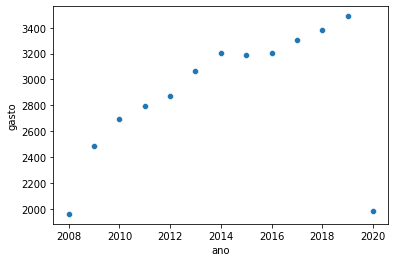

In [9]:
sns.scatterplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto")

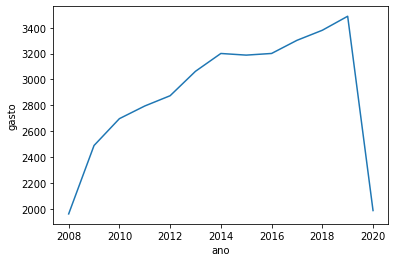

In [10]:
sns.lineplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto")

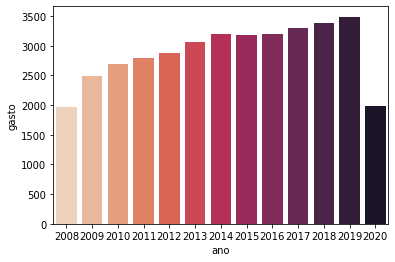

In [17]:
sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto", palette=sns.color_palette("rocket_r",13))#palette='rocket')

In [24]:
estados = ["São Paulo", "Minas Gerais", "Pernambuco"]
por_ano_dos_estados = mensal_aberto.query("uf in @estados").groupby(["uf", "ano"]).sum().reset_index()
por_ano_dos_estados.head()

,uf,ano,gasto,mes,gasto_diario
0,Minas Gerais,2008,894.35,77,29.36
1,Minas Gerais,2009,"1,149.14",78,37.77
2,Minas Gerais,2010,"1,217.49",78,40.03
3,Minas Gerais,2011,"1,315.02",78,43.24
4,Minas Gerais,2012,"1,408.35",78,46.16


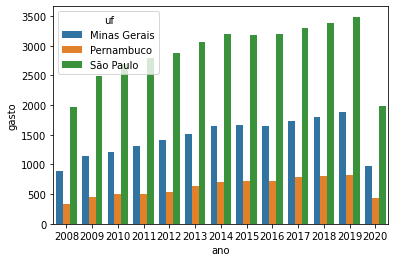

In [28]:
sns.barplot(data=por_ano_dos_estados, x="ano", y="gasto", hue="uf")

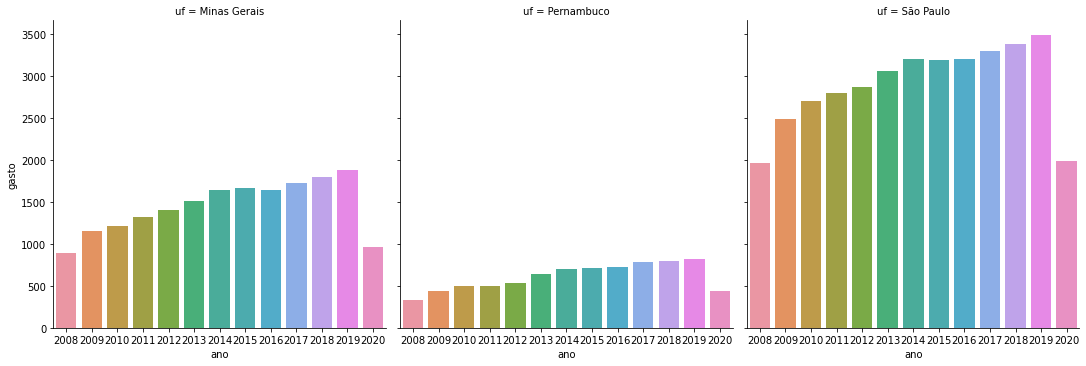

In [30]:
 sns.catplot(data=por_ano_dos_estados, x="ano", y="gasto", kind="bar", col="uf")

# Desafio

## Desafio 01: Reordenar as cores pelo valor do eixo y.

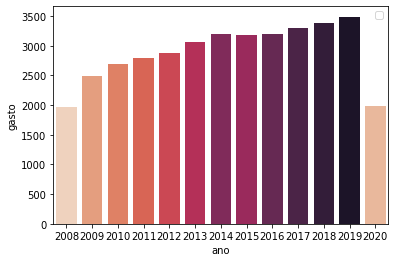

In [49]:
sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto", hue="gasto", dodge=False, palette=sns.color_palette("rocket_r",13))#palette='rocket')
plt.legend('')

## Desafio 02: Explorar a documentação do Seaborn.

## Desafio 03: Pensar e elaborar novos gráficos depois de estudar o Seaborn, compartilhar com uma breve descrição no Discord, para que outros colegas aprendam sobre o gráfico usado.

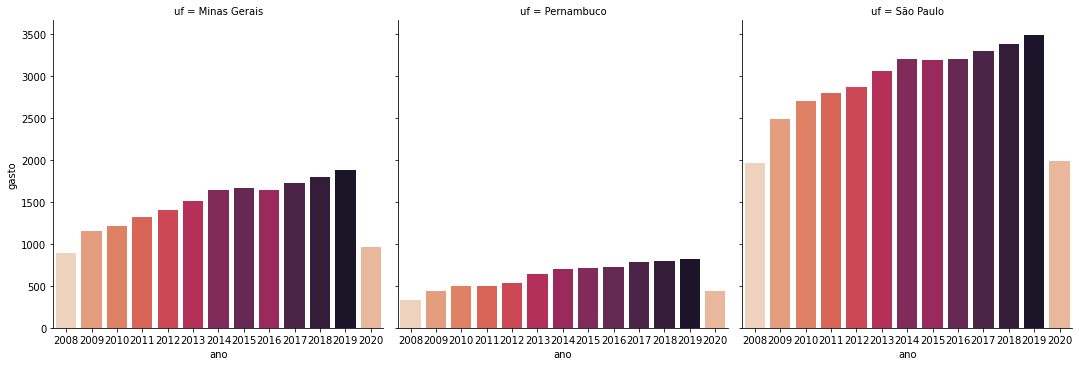

In [47]:
ax = sns.catplot(data=por_ano_dos_estados, x="ano", y="gasto", kind="bar", col="uf", hue="gasto", dodge=False, palette=sns.color_palette("rocket_r",13))
ax._legend.remove()

## Desafio 04: Baixe uma outra base de dados do tabnet e execute sua análise de forma similar a aula.